##(Batch) Gradient descent

Gradient descent is an optimization algorithm that works by efficiently searching the parameter space, intercept($\theta_0$) and slope($\theta_1$) for linear regression, according to the following rule:

\begin{aligned} \theta := \theta -\alpha \frac{\delta}{\delta \theta}J(\theta). \end{aligned} 
Note that we used '$:=$' to denote an assign or an update.

The \(J(\theta)\) is known as the cost function and \(\alpha\) is the learning rate, a free parameter. In this tutorial, we're going to use a least squares cost function defined as following:

\begin{aligned} J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2, \end{aligned}
where \(m\) is the total number of training examples and $h_\theta(x^{(i)})$ is the hypothesis function defined like this:

\begin{aligned} h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)} \end{aligned}
where the super script $(i)$ is used to denote the $i^{th}$ sample (we'll save subscripts for the index to a feature when we deal with multi-features).

We need derivatives for both $\theta_0$ and $\theta_1$:

\begin{aligned} \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) \end{aligned}

\begin{aligned} = \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}-y^{(i)}) \end{aligned} 

\begin{aligned} \frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x^{(i)} \end{aligned} 

\begin{aligned} = \frac{1}{m} \sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}-y^{(i)})x^{(i)} \end{aligned} 

From: <a href = "http://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php"> Source </a>

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import scipy.stats as stats

## Implementation 1:

Pure python

x.shape = %s y.shape = %s (100, 1) (100,)
Converged, iterations:  642 !!!
theta0 = %s theta1 = %s [-2.81878447] [ 43.13907321]
intercept = %s slope = %s -2.84963639461 43.2042438802


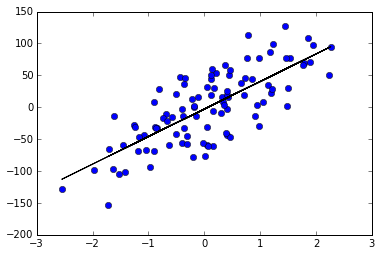

Done!


In [5]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print('x.shape = %s y.shape = %s', x.shape, y.shape)
 
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
    theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)
    print('theta0 = %s theta1 = %s', theta0, theta1) 

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print('intercept = %s slope = %s', intercept, slope)

    # plot
    for i in range(x.shape[0]):
          y_predict = theta0 + theta1*x 

    plt.plot(x,y,'o')
    plt.plot(x,y_predict,'k-')
    plt.show()
    print("Done!")

## Implementation 2

Numpy

The regression line in the picture above confirms we got the right result from our Gradient Descent algorithm. Also, the sciPy's stats.linregress reassures (intercept and slope values) the correctness of our outcome (theta0 and theta1).

The the code, we need a little bit careful when we updates $\theta_0$ and $\theta_0$. First, we calculate the temporary $\theta_0$ and $\theta_1$ with old $\theta_0$ and $\theta_1$, and then we get new $\theta_0$ and $\theta_1$ from temp0 and temp1:

\begin{aligned} temp0 := \theta_0 -\alpha \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) \end{aligned}
\begin{aligned} temp1 := \theta_1 -\alpha \frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) \end{aligned}
\begin{aligned} \theta_0 := temp0 \end{aligned}
\begin{aligned} \theta_1 := temp1. \end{aligned}


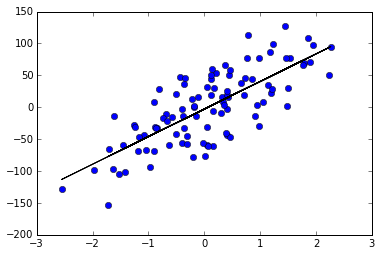

Done!


In [6]:
def gradient_descent_2(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        #print("iter %s | J: %.3f", iter, J)
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.01 # learning rate
    theta = gradient_descent_2(alpha, x, y, 1000)

    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    plt.plot(x[:,1],y,'o')
    plt.plot(x,y_predict,'k-')
    plt.show()
    print("Done!")